In [1]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=3d0506461e503a73a73e4c657157b27bf08cd34966879b520c4cd206a5e3fe24
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [2]:
import os
import re
from pathlib import Path
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import *
from collections import Counter
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.exceptions import ConvergenceWarning
import numpy as np
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import random
import wget
random.seed()
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [ ]:
filename = wget.download("https://github.com/MIE451-1513-2019/course-datasets/raw/master/20_newsgroups.zip", "20_newsgroups.zip")
!unzip 20_newsgroups.zip
DATA_DIR = "20_newsgroups"

In [4]:
DATA_DIR = "20_newsgroups"

## Functions from lab

In [46]:
def clean_file_text(text):
    new_text = re.sub("Newsgroups:.*?\n", "", text)
    new_text = re.sub("Xref:.*?\n", "", new_text)
    new_text = re.sub("Path:.*?\n", "", new_text)
    new_text = re.sub("Date:.*?\n", "", new_text)
    new_text = re.sub("Followup-To:.*?\n", "", new_text)
    return new_text

In [47]:
def corpus_count_words(file_list):
    tokenizer = RegexpTokenizer(r'\w+')

    word_counter = Counter()
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text(file_data)
            file_words = tokenizer.tokenize(file_data)
            word_counter.update(file_words)
    return word_counter

In [155]:
def corpus_count_words_new(file_list):
    tokenizer = RegexpTokenizer(r'\w+')

    stemmer = SnowballStemmer("english")
    stop_words = stopwords.words("english")

    word_counter = Counter()
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text(file_data)
            file_words = tokenizer.tokenize(file_data)
            file_words = [w for w in file_words if not w in stop_words] 
            file_words = [stemmer.stem(w) for w in file_words]
            file_words = [w for w in file_words if not w.isdigit()]
            file_words = [w for w in file_words if not len(w) <= 2]
            word_counter.update(file_words)
    return word_counter

In [48]:
def get_topic_name(file_path):
    return file_path.parent.name

def get_target(topic_name):
    topics = ['talk.politics.mideast', 'rec.autos', 'comp.sys.mac.hardware', 'alt.atheism', 'rec.sport.baseball', 
     'comp.os.ms-windows.misc', 'rec.sport.hockey', 'sci.crypt', 'sci.med', 'talk.politics.misc', 
     'rec.motorcycles', 'comp.windows.x', 'comp.graphics', 'comp.sys.ibm.pc.hardware', 'sci.electronics',
     'talk.politics.guns', 'sci.space', 'soc.religion.christian', 'misc.forsale', 'talk.religion.misc']
    return topics.index(topic_name)

In [49]:
def plot_confusion_matrix(cm):
    # plot the confusion matrix
    plt.figure(figsize=(10,10))
    plt.matshow(cm, fignum=1)
    
    # add labels for all targets
    num_targets = cm.shape[0]
    plt.xticks(list(range(num_targets+1)))
    plt.yticks(list(range(num_targets+1)))

## Q1

In [50]:
all_files = [pth for pth in Path(DATA_DIR).glob("**/*") if pth.is_file() and not pth.name.startswith(".")]

In [51]:
def binary_baseline_data(file_list, num_words = 1000):
    # Calculate word count in corpus
    news_cnt = corpus_count_words(file_list)
    
    # Select the most common numWords
    word_list = [word for (word, freq) in news_cnt.most_common(num_words)]
    
    # Create a binary encoding of dataset based on the selected features (X)
    tokenizer = RegexpTokenizer(r'\w+') 
    df_rows = []
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text(file_data)
            file_words = tokenizer.tokenize(file_data)
            df_rows.append([1 if word in file_words else 0 for word in word_list])      
    X = pd.DataFrame(df_rows, index=[str(f) for f in file_list], columns = word_list)
    
    # Create a dataframe of targets (y)
    y = [get_target(get_topic_name(file_path)) for file_path in file_list]
    
    return X, y

In [52]:
# get the baseline data
X, y = binary_baseline_data(all_files)

# split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# train a logistic regression classifier
clf = LogisticRegression(C=1.0).fit(X_train, y_train)

# predict on train and test set
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)

# calculate train and test accuracy
train_accuracy = accuracy_score(y_train, y_train_predict)
test_accuracy = accuracy_score(y_test, y_test_predict)

# report results
print("Train accuracy: {}".format(train_accuracy))
print("Test accuracy: {}".format(test_accuracy))

Train accuracy: 0.9472744159462742
Test accuracy: 0.6776666666666666


In [53]:
X_train.size
X_test.size

6000000

### Q1 (a)

The size of feature set is 1000. They are the top 1000 most frequent words appearred among all files. the amount of data for training is 13997000, and for testing is 6000000. The hyperparameters for the baseline are all default, such as default solver, number of iteration to convergence, size of penalty etc..


### Q1 (b)

Modify the following function:

In [ ]:
nltk.download("wordnet")
nltk.download("stopwords")

In [55]:
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

In [156]:
def binary_improved_data(file_list, num_words = 1050):
    # Put your code here
    # Make sure you update the variable features and targets below
    news_cnt = corpus_count_words_new(file_list)

    stemmer = SnowballStemmer("english")
    stop_words = stopwords.words("english")

    # news_cnt = [w for w in news_cnt if not w in stop_words] 
    # news_cnt = [stemmer.stem(w) for w in news_cnt]

    # Select the most common numWords
    word_list = [word for (word, freq) in news_cnt.most_common(num_words)]
    word_list = word_list[50:]
    # Create a binary encoding of dataset based on the selected features (X)
    tokenizer = RegexpTokenizer(r'\w+') 
    df_rows = []
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text(file_data)
            file_words = tokenizer.tokenize(file_data)
            file_words = [w for w in file_words if not w in stop_words] 
            file_words = [stemmer.stem(w) for w in file_words]
            df_rows.append([1 if word in file_words else 0 for word in word_list])  
    X = pd.DataFrame(df_rows, index=[str(f) for f in file_list], columns = word_list)
    # Create a dataframe of targets (y)
    y = [get_target(get_topic_name(file_path)) for file_path in file_list]

    #Please remember to put index for your dataframe as the file name
    #For example: pd.DataFrame(data, index=[str(f) for f in file_list],columns=[])
    
    # validate return types
    assert isinstance(X, pd.DataFrame) and isinstance(y, list), "return types"
    
    return X, y

### Q1 (c)

Modify the following partial code to calculate the train and test accuracy and answer the question in the markdown cell below

In [157]:
# get the baseline data
X, y = binary_improved_data(all_files)

# Write your code here:
# You need to split the data and train a logistic regression classifier.
# Then, you need to calculate the variables train_accuracy and test_accuracy for the new classifier

# split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# train a logistic regression classifier
clf = LogisticRegression(C=1.0).fit(X_train, y_train)

# predict on train and test set
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)

# calculate train and test accuracy
train_accuracy = accuracy_score(y_train, y_train_predict)
test_accuracy = accuracy_score(y_test, y_test_predict)

# report results
print("Train accuracy: {}".format(train_accuracy))
print("Test accuracy: {}".format(test_accuracy))


Train accuracy: 0.9557047938844038
Test accuracy: 0.7316666666666667


After using snowballstemmer and eliminate the stopwords, the accuracy for testing is improved by around 5%, and the training accuracy is moderately the same. 

### Q1 (d)

Modify the partial code below

In [158]:
def random_mean_ci(X, y, num_tests):
    # train_results is a list of train accuracy results for the differrent random splits of the dataset
    train_results = []
    
    # test_results is a list of test accuracy results for the differrent random splits of the dataset
    test_results = []
    
    # Write your code here
    randstate_list = [random.randint(1,1000) for i in range(num_tests)]
    for randstate in randstate_list:

        # split to train and test set
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=randstate)
        # train a logistic regression classifier
        clf = LogisticRegression(C=1.0).fit(X_train, y_train)

        # predict on train and test set
        y_train_predict = clf.predict(X_train)
        y_test_predict = clf.predict(X_test)

        # calculate train and test accuracy
        train_accuracy = accuracy_score(y_train, y_train_predict)
        test_accuracy = accuracy_score(y_test, y_test_predict)

        train_results.append(train_accuracy)
        test_results.append(test_accuracy)

    # calculate the train mean and the 95% confidence interval for the list of results
    train_mean = np.mean(train_results)
    train_ci_low, train_ci_high = stats.t.interval(0.95, len(train_results)-1, loc=train_mean, scale=stats.sem(train_results))
    
    # calculate the test mean and the 95% confidence interval for the list of results
    test_mean = np.mean(test_results)
    test_ci_low, test_ci_high = stats.t.interval(0.95, len(test_results)-1, loc=test_mean, scale=stats.sem(test_results))
    
    # validate return types
    assert isinstance(train_mean, float) and isinstance(train_ci_low, float) and isinstance(train_ci_high, float), "return types"
    assert isinstance(test_mean, float) and isinstance(test_ci_low, float) and isinstance(test_ci_high, float), "return types"
    
    return train_mean, train_ci_low, train_ci_high, test_mean, test_ci_low, test_ci_high

In [167]:
def random_mean_ci_new(X, y, num_tests, C):
    # train_results is a list of train accuracy results for the differrent random splits of the dataset
    train_results = []
    
    # test_results is a list of test accuracy results for the differrent random splits of the dataset
    test_results = []
    
    # Write your code here
    randstate_list = [random.randint(1,1000) for i in range(num_tests)]
    for randstate in randstate_list:

        # split to train and test set
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=randstate)
        # train a logistic regression classifier
        clf = LogisticRegression(C=C).fit(X_train, y_train)

        # predict on train and test set
        y_train_predict = clf.predict(X_train)
        y_test_predict = clf.predict(X_test)

        # calculate train and test accuracy
        train_accuracy = accuracy_score(y_train, y_train_predict)
        test_accuracy = accuracy_score(y_test, y_test_predict)

        train_results.append(train_accuracy)
        test_results.append(test_accuracy)

    # calculate the train mean and the 95% confidence interval for the list of results
    train_mean = np.mean(train_results)
    train_ci_low, train_ci_high = stats.t.interval(0.95, len(train_results)-1, loc=train_mean, scale=stats.sem(train_results))
    
    # calculate the test mean and the 95% confidence interval for the list of results
    test_mean = np.mean(test_results)
    test_ci_low, test_ci_high = stats.t.interval(0.95, len(test_results)-1, loc=test_mean, scale=stats.sem(test_results))
    
    # validate return types
    assert isinstance(train_mean, float) and isinstance(train_ci_low, float) and isinstance(train_ci_high, float), "return types"
    assert isinstance(test_mean, float) and isinstance(test_ci_low, float) and isinstance(test_ci_high, float), "return types"
    
    return train_mean, train_ci_low, train_ci_high, test_mean, test_ci_low, test_ci_high

### Q1 (e)

Use the following code to calculate the mean accuracy and 95% confidence interval over 10 random splits

In [159]:
train_mean10, train_low10, train_high10, test_mean10, test_low10, test_high10 = random_mean_ci(X, y, num_tests = 10)
print("Train mean accuracy over 10 random splits: {}".format(train_mean10))
print("Train confidence interval over 10 random splits: [{}, {}]".format(train_low10, train_high10))
print("Test mean accuracy over 10 random splits: {}".format(test_mean10))
print("Test confidence interval over 10 random splits: [{}, {}]".format(test_low10, test_high10))

Train mean accuracy over 10 random splits: 0.9574980352932773
Train confidence interval over 10 random splits: [0.956524612528111, 0.9584714580584435]
Test mean accuracy over 10 random splits: 0.7380833333333333
Test confidence interval over 10 random splits: [0.7346946389064031, 0.7414720277602636]


The difference b/t single trial score and average of 10 trial is really small. However, this is more informative, cuz now we know the variance is small, and we are 95% certain that the true mean would be within the range.

### Q1 (f)

Modify the partial code below

In [160]:
def random_cm(X, y, num_tests):
    # cm_list is a list of confusion matrices for the different random splits of the dataset
    cm_list = []
    
    # Write your code here
    randstate_list = [random.randint(1,1000) for i in range(num_tests)]
    for randstate in randstate_list:

        # split to train and test set
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=randstate)
        # train a logistic regression classifier
        clf = LogisticRegression(C=1.0).fit(X_train, y_train)

        # predict on train and test set
        y_train_predict = clf.predict(X_train)
        y_test_predict = clf.predict(X_test)

        cm = confusion_matrix(y_test, y_test_predict)
        cm_list.append(cm)


    # sum the confusion matrices and return the combined confusion matrix
    combined_cm = np.array(cm_list).sum(axis=0)

    # validate return type
    assert isinstance(combined_cm, np.ndarray), "return type"
    
    return combined_cm

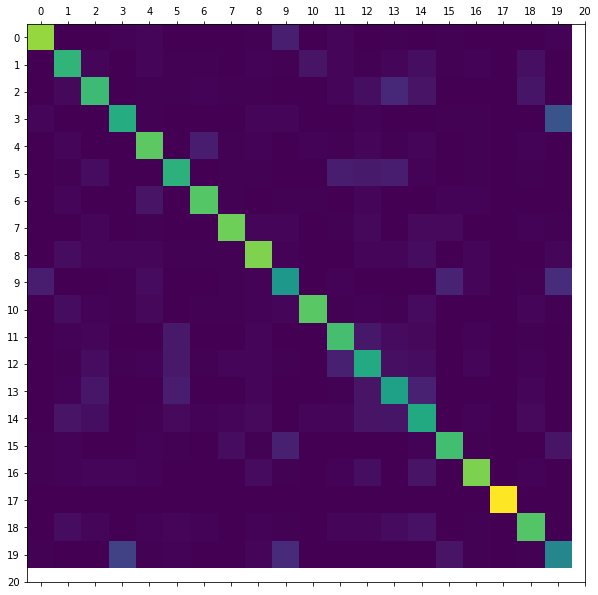

In [161]:
cm = confusion_matrix(y_test, y_test_predict)
plot_confusion_matrix(cm)

### Q1 (g)

Use the following code to produce a confusion matrix for 10 random splits

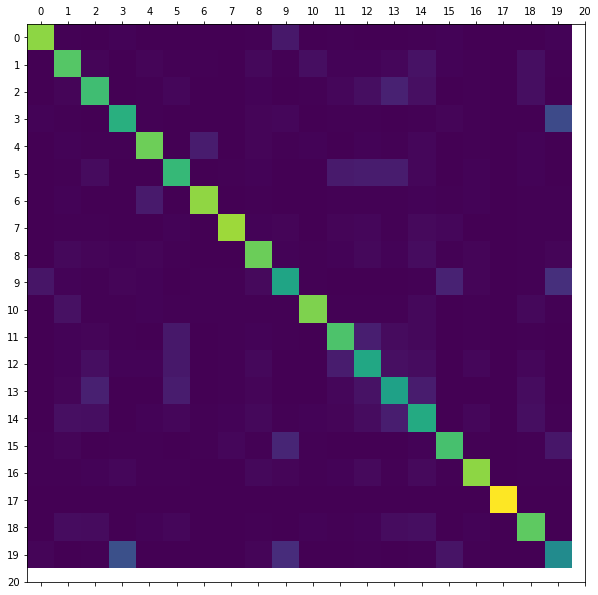

In [162]:
cm10 = random_cm(X, y, num_tests = 10)
plot_confusion_matrix(cm10)

'alt.atheism' and 'talk.religion.misc' are really easy to confused with. one is about people not believing in any religion, one is talking about religions. They are quite similiar in terms of their vocabulary.

## Q2

### Q2 (a)

Modify the partial code below

In [64]:
def feature_num(X, y):
    # result_list is a list of tuples (num_features, train_accuracy, test_accuracy)
    # where numFeatures is the number of words used as features
    result_list = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for p in [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]:
        subset_size = int(p*X.shape[1])
        X_train_subset = X_train.iloc[:, 0:subset_size]
        X_test_subset = X_test.iloc[:, 0:subset_size]
        # Write your code here to calculate train_accuracy and test_accuracy for the current subset of features
        # ......
        clf = LogisticRegression(C=1.0).fit(X_train_subset, y_train)

        # predict on train and test set
        y_train_predict = clf.predict(X_train_subset)
        y_test_predict = clf.predict(X_test_subset)

        train_accuracy = accuracy_score(y_train, y_train_predict)
        test_accuracy = accuracy_score(y_test, y_test_predict)
        
        # add to result_list
        result_list.append((p, train_accuracy, test_accuracy))
        
    # Make a dataframe of the results
    result_df = pd.DataFrame(result_list, columns=["num_features", "train_accuracy", "test_accuracy"])
    
    # validate return type
    assert isinstance(result_df, pd.DataFrame), "return type"
    
    return result_df

### Q2 (b)

Use the following code to plot the train and test accuracy for the different feature sets sizes

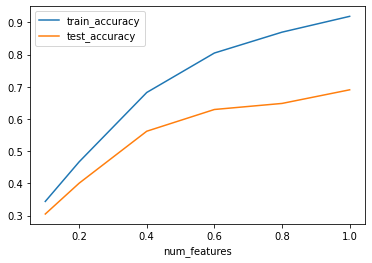

In [65]:
feature_num_df = feature_num(X, y)
feature_num_df.plot(x="num_features", y=["train_accuracy", "test_accuracy"])

From the plot, we can see that with more features being considered, both training and testing accuracy improves, but the overfitting issue is also getting worse. Thus, My idea number of feature would probably be 400 or 600

## Q3

### Q3 (a)

Modify the partial code below

In [66]:
def hyperparameter(X, y):
    # result_list is a list of tuples (num_features, train_accuracy, test_accuracy)
    # where numFeatures is the number of words used as features
    result_list = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for param in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
        # Write your code here to calculate train_accuracy and test_accuracy for the current parameter value
        # ......
        clf = LogisticRegression(C=param).fit(X_train, y_train)

        # predict on train and test set
        y_train_predict = clf.predict(X_train)
        y_test_predict = clf.predict(X_test)

        train_accuracy = accuracy_score(y_train, y_train_predict)
        test_accuracy = accuracy_score(y_test, y_test_predict)
    
        # add to result_list
        result_list.append((param, train_accuracy, test_accuracy))
        
    # Make a dataframe of the results
    result_df = pd.DataFrame(result_list, columns=["param", "train_accuracy", "test_accuracy"])
    
    # validate return type
    assert isinstance(result_df, pd.DataFrame), "return type"
    
    return result_df

### Q3 (b)

Use the following code to plot the train and test accuracy for the different the parameters

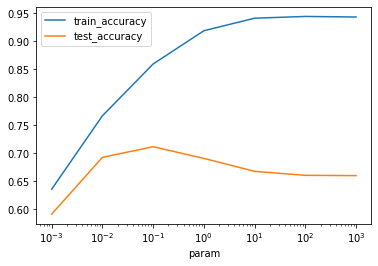

In [67]:
param_df = hyperparameter(X, y)
param_df.plot(x="param", y=["train_accuracy", "test_accuracy"], logx=True)

From the plot, we learned that with C increasing, the training accuracy is also always increase, but the testing accuracy reached its peak when C =0.1. The overfitting issue is also getting worse. probably C =0.1 is good for the model.

## Q4

### Q4 (a)

Modify the partial code below

In [90]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [180]:
def tf_improved_data(file_list, num_words = 1000):
    # Put your code here
    # Make sure you update the variable features and targets below
    news_cnt = corpus_count_words_new(file_list)

    
    stemmer = SnowballStemmer("english")
    stop_words = stopwords.words("english")

    # Select the most common numWords
    word_list = [word for (word, freq) in news_cnt.most_common(num_words)]
    word_list = [w for w in word_list if not w in stop_words] 
    word_list = [stemmer.stem(w) for w in word_list]
    
    class StemmedCountVectorizer(CountVectorizer):
        def build_analyzer(self):
            analyzer = super(StemmedCountVectorizer, self).build_analyzer()
            return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])

    tokenizer = RegexpTokenizer(r'\w+') 
    vectorizer = CountVectorizer(stop_words = stop_words, tokenizer = tokenizer.tokenize )

    # Create a TF encoding of dataset based on the selected features (X)
    df_rows = []
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text(file_data)
            # print(file_data)
            TF = vectorizer.fit_transform([file_data]).toarray()
            token_list = vectorizer.get_feature_names()
            df_rows.append([TF[0][token_list.index(word)] if word in token_list else 0 for word in word_list])     
    X = pd.DataFrame(df_rows, index=[str(f) for f in file_list], columns = word_list)
    
    # Create a dataframe of targets (y)
    y = [get_target(get_topic_name(file_path)) for file_path in file_list]

    #Please remember to put index for your dataframe as the file name
    #For example: pd.DataFrame(data, index=[str(f) for f in file_list],columns=[])
    
    # validate return types
    assert isinstance(X, pd.DataFrame) and isinstance(y, list), "return types"
    
    return X, y


In [181]:
X_tf, y_tf = tf_improved_data(all_files)

In [ ]:
y_tf

### Q4 (b)

Use the following code to calculate the mean accuracy and 95% confidence interval over multiple random splits

###TF Encoding


In [182]:
# X_tf, y_tf = tf_improved_data(all_files)
train_mean10, train_low10, train_high10, test_mean10, test_low10, test_high10 = random_mean_ci(X_tf, y_tf, num_tests = 10)
print("Train mean accuracy over 10 random splits: {}".format(train_mean10))
print("Train confidence interval over 10 random splits: [{}, {}]".format(train_low10, train_high10))
print("Test mean accuracy over 10 random splits: {}".format(test_mean10))
print("Test confidence interval over 10 random splits: [{}, {}]".format(test_low10, test_high10))

Train mean accuracy over 10 random splits: 0.8824819604200901
Train confidence interval over 10 random splits: [0.8796786833327427, 0.8852852375074375]
Test mean accuracy over 10 random splits: 0.6677166666666667
Test confidence interval over 10 random splits: [0.6643797304337287, 0.6710536028996048]


In [183]:
train_mean10, train_low10, train_high10, test_mean10, test_low10, test_high10 = random_mean_ci_new(X_tf, y_tf, num_tests = 10, C=0.1)
print("Train mean accuracy over 10 random splits: {}".format(train_mean10))
print("Train confidence interval over 10 random splits: [{}, {}]".format(train_low10, train_high10))
print("Test mean accuracy over 10 random splits: {}".format(test_mean10))
print("Test confidence interval over 10 random splits: [{}, {}]".format(test_low10, test_high10))

Train mean accuracy over 10 random splits: 0.8293562906337073
Train confidence interval over 10 random splits: [0.8282828224994837, 0.8304297587679309]
Test mean accuracy over 10 random splits: 0.6885166666666668
Test confidence interval over 10 random splits: [0.6851330097368177, 0.6919003235965159]


### Binary Encoding

In [166]:
train_mean10, train_low10, train_high10, test_mean10, test_low10, test_high10 = random_mean_ci(X, y, num_tests = 10)
print("Train mean accuracy over 10 random splits: {}".format(train_mean10))
print("Train confidence interval over 10 random splits: [{}, {}]".format(train_low10, train_high10))
print("Test mean accuracy over 10 random splits: {}".format(test_mean10))
print("Test confidence interval over 10 random splits: [{}, {}]".format(test_low10, test_high10))

Train mean accuracy over 10 random splits: 0.9573837250839465
Train confidence interval over 10 random splits: [0.9559581400889363, 0.9588093100789568]
Test mean accuracy over 10 random splits: 0.7366333333333333
Test confidence interval over 10 random splits: [0.7319445124063364, 0.7413221542603301]


By comparing two results, it shows that binary encoding is better than TF encoding in terms of testing accuracy and training accuracy, but the overfiting problem for binary encoding is way worse than tf encoding. 
Reason why testing accuracy for tf encoding is worse than binary encoding could be the hyperparameter "C". "C" is the inverse of regulazation strength. With C=1, we didnt assign more value to less frequent terms, thus we didnt utilize the purpose of TF encoding. 

## Q5

### Q5 (a)

Modify the partial code below

In [202]:
def nb_random_mean_ci(X, y, num_tests):
    # train_results is a list of train accuracy results for the differrent random splits of the dataset
    train_results = []
    
    # test_results is a list of test accuracy results for the differrent random splits of the dataset
    test_results = []
    
    # Write your code here
    randstate_list = [random.randint(1,1000) for i in range(num_tests)]
    for randstate in randstate_list:

        # split to train and test set
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=randstate)
        multnb = MultinomialNB(alpha=0.1)

        multnb.fit(X_train,y_train)

        y_train_predict = multnb.predict(X_train)
        y_test_predict = multnb.predict(X_test)

        train_accuracy = accuracy_score(y_train, y_train_predict)
        test_accuracy = accuracy_score(y_test, y_test_predict)

        train_results.append(train_accuracy)
        test_results.append(test_accuracy)

    # calculate the train mean and the 95% confidence interval for the list of results
    train_mean = np.mean(train_results)
    train_ci_low, train_ci_high = stats.t.interval(0.95, len(train_results)-1, loc=train_mean, scale=stats.sem(train_results))
    
    # calculate the test mean and the 95% confidence interval for the list of results
    test_mean = np.mean(test_results)
    test_ci_low, test_ci_high = stats.t.interval(0.95, len(test_results)-1, loc=test_mean, scale=stats.sem(test_results))
    
    # validate return types
    assert isinstance(train_mean, float) and isinstance(train_ci_low, float) and isinstance(train_ci_high, float), "return types"
    assert isinstance(test_mean, float) and isinstance(test_ci_low, float) and isinstance(test_ci_high, float), "return types"
    
    return train_mean, train_ci_low, train_ci_high, test_mean, test_ci_low, test_ci_high

### Q5 (b)

Use the following code to calculate the mean accuracy and 95% confidence interval over multiple random splits

In [188]:
train_mean10, train_low10, train_high10, test_mean10, test_low10, test_high10 = nb_random_mean_ci(X, y, num_tests = 20)
print("Train mean accuracy over 10 random splits: {}".format(train_mean10))
print("Train confidence interval over 10 random splits: [{}, {}]".format(train_low10, train_high10))
print("Test mean accuracy over 10 random splits: {}".format(test_mean10))
print("Test confidence interval over 10 random splits: [{}, {}]".format(test_low10, test_high10))

Train mean accuracy over 10 random splits: 0.7932485532614131
Train confidence interval over 10 random splits: [0.7923853855559092, 0.794111720966917]
Test mean accuracy over 10 random splits: 0.7442500000000001
Test confidence interval over 10 random splits: [0.7420137004519733, 0.7464862995480268]


In [189]:
train_mean10, train_low10, train_high10, test_mean10, test_low10, test_high10 = random_mean_ci(X, y, num_tests = 20)
print("Train mean accuracy over 10 random splits: {}".format(train_mean10))
print("Train confidence interval over 10 random splits: [{}, {}]".format(train_low10, train_high10))
print("Test mean accuracy over 10 random splits: {}".format(test_mean10))
print("Test confidence interval over 10 random splits: [{}, {}]".format(test_low10, test_high10))

Train mean accuracy over 10 random splits: 0.9572336929342002
Train confidence interval over 10 random splits: [0.9565963691827102, 0.9578710166856903]
Test mean accuracy over 10 random splits: 0.7392666666666666
Test confidence interval over 10 random splits: [0.7366943421504236, 0.7418389911829096]


From the results, it is obvious that multinomial NB has a better testing accuracy. The overfitting problem is really bad for logistic classification. since the testing accuracy difference b/t two classifers is not that significant, I would say NB is better 

## Q6

### Q6 (a)

Modify the partial code below

In [79]:
def binary_med_data(file_list, num_words = 1000):
    # Put your code here
    # Make sure you update the variable features and targets below
    
    news_cnt = corpus_count_words(file_list)

    stemmer = SnowballStemmer("english")
    stop_words = stopwords.words("english")

    # news_cnt = [w for w in news_cnt if not w in stop_words] 
    # news_cnt = [stemmer.stem(w) for w in news_cnt]

    # Select the most common numWords
    word_list = [word for (word, freq) in news_cnt.most_common(num_words)]
    word_list = [w for w in word_list if not w in stop_words] 
    word_list = [stemmer.stem(w) for w in word_list]
    
    # Create a binary encoding of dataset based on the selected features (X)
    tokenizer = RegexpTokenizer(r'\w+') 
    df_rows = []
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text(file_data)
            file_words = tokenizer.tokenize(file_data)
            file_words = [w for w in file_words if not w in stop_words] 
            file_words = [stemmer.stem(w) for w in file_words]
            df_rows.append([1 if word in file_words else 0 for word in word_list])  
    X = pd.DataFrame(df_rows, index=[str(f) for f in file_list], columns = word_list)
    # Create a dataframe of targets (y)
    y = [1 if get_topic_name(file_path) == 'sci.med' else 0 for file_path in file_list]

    #Please remember to put index for your dataframe as the file name
    #For example: pd.DataFrame(data, index=[str(f) for f in file_list],columns=[])
    
    # validate return types
    assert isinstance(X, pd.DataFrame) and isinstance(y, list), "return types"
    
    return X, y

### Q6 (b)

Use the following code to calculate the mean accuracy and 95% confidence interval over multiple random splits

In [80]:
X, y = binary_med_data(all_files)
train_mean10, train_low10, train_high10, test_mean10, test_low10, test_high10 = random_mean_ci(X, y, num_tests = 10)
print("Train mean accuracy over 10 random splits: {}".format(train_mean10))
print("Train confidence interval over 10 random splits: [{}, {}]".format(train_low10, train_high10))
print("Test mean accuracy over 10 random splits: {}".format(test_mean10))
print("Test confidence interval over 10 random splits: [{}, {}]".format(test_low10, test_high10))

Train mean accuracy over 10 random splits: 0.9821175966278488
Train confidence interval over 10 random splits: [0.9812610250080355, 0.9829741682476622]
Test mean accuracy over 10 random splits: 0.9652833333333334
Test confidence interval over 10 random splits: [0.9630734108802929, 0.9674932557863739]


The average testing accuracy is 96.5% with 95% C.I[0.9630734108802929, 0.9674932557863739], which is really good. We are 95% certain that the true mean is within that range. the performance is way better than multiclass classfication.

#Q7

##Q7(a)

use the following code cell to implement your feature encoding

In [193]:
def data_q7(file_list, num_words = 1050):

    # Put your code here
    # Make sure you update the variable features and targets below
    news_cnt = corpus_count_words_new(file_list)

    stemmer = SnowballStemmer("english")
    stop_words = stopwords.words("english")

    # news_cnt = [w for w in news_cnt if not w in stop_words] 
    # news_cnt = [stemmer.stem(w) for w in news_cnt]

    # Select the most common numWords
    word_list = [word for (word, freq) in news_cnt.most_common(num_words)]
    word_list = word_list[50:]
    # Create a binary encoding of dataset based on the selected features (X)
    tokenizer = RegexpTokenizer(r'\w+') 
    df_rows = []
    for file_path in file_list:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            file_data = file.read()
            file_data = clean_file_text(file_data)
            file_words = tokenizer.tokenize(file_data)
            file_words = [w for w in file_words if not w in stop_words] 
            file_words = [stemmer.stem(w) for w in file_words]
            df_rows.append([1 if word in file_words else 0 for word in word_list])  
    X = pd.DataFrame(df_rows, index=[str(f) for f in file_list], columns = word_list)
    # Create a dataframe of targets (y)
    y = [get_target(get_topic_name(file_path)) for file_path in file_list]

    #Please remember to put index for your dataframe as the file name
    #For example: pd.DataFrame(data, index=[str(f) for f in file_list],columns=[])
    
    # validate return types
    assert isinstance(X, pd.DataFrame) and isinstance(y, list), "return types"
    
    return X, y

##Q7(b)

Use the following code cell to implement your model

In [194]:
def build_model_q7():
  #write your code here, define your model
  MODELQ7= MultinomialNB()

  return MODELQ7

Code for evaluating p at k 

In [195]:
def calculate_average_precision_at_k(MODELQ7, all_files, training_files, testing_files,k=None):
  
  training_files = [str(f) for f in open(training_files,mode='r').read().splitlines()]
  testing_files = [str(f) for f in open(testing_files,mode='r').read().splitlines()]
  if k is None:
    k=len(testing_files)

  X, y = data_q7(all_files) 
  X['gt'] = y
  training = X.loc[training_files]
  X_train = training.loc[:,training.columns!='gt']
  y_train = training['gt'].values

  testing = X.loc[testing_files]
  X_test = testing.loc[:,testing.columns!='gt']
  y_test = testing['gt'].values

  MODELQ7.fit(X_train,y_train)
  y_pred = MODELQ7.predict(X_test)
  y_pred_prob = MODELQ7.predict_proba(X_test)
  confidences = np.max(y_pred_prob,axis=1)
  
  p_at_k = []
  rel_at_k = []
  confidence_order = np.argsort(confidences)
  for i in range(1,k+1):
    top_confidence = confidence_order[-i:]
    pred_top_i = y_pred[top_confidence]
    gt_top_i = np.array(y_test)[top_confidence]
    p_at_i = np.sum(pred_top_i == gt_top_i)/i
    rel_at_i = (pred_top_i[0] == gt_top_i[0])
    p_at_k.append(p_at_i)
    rel_at_k.append(rel_at_i)
  print('average precision at {} is {}'.format(k,np.dot(p_at_k,rel_at_k)/k))
  return np.dot(p_at_k,rel_at_k)/k

In [197]:
# Example usage:
m = calculate_average_precision_at_k(MultinomialNB(), all_files, 'training_files_Q7.txt', 'testing_files_Q7.txt')

average precision at 4000 is 0.553828264527913


##Q7(c)


snowballstemmer, stop words, all the numbers - they all cleaned up the feature word_list

Binary encoding - The result is better than TF encoding (and i dont understand why it happens even after i tried different C in logistic classification

multinomial NB - more accurate, no overfitting issue

